In [2]:
import pandas as pd
import numpy as np
import pandas as pd 
import numpy as np
import random as rd
import datetime
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns 
import  statsmodels.tsa.api as smt
import statsmodels.api as sn 
from statsmodels.tsa.stattools import adfuller

In [16]:
!pip install pystan==2.19
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 64.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.0.0-cp38-cp38-linux_x86_64.whl size=61788302 sha256=42a051458824e8ce17650ba5bbf6eef0935d952a43b9df11b819501fd00ccc0a
  Stored in directory: /root/.cache/pip/wheels/92/af/46/7a021b32f4f0dec5d0a7b669e13b95a40a62ce007ac1039442
Successfully built pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9086075 sha256=fb2c5f83a4b2e28

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Data Science Bootcamp 20/Week 10/Python/wiki_machine_learning.csv', sep=' ')
df=data.copy()

In [4]:
df.head(10)

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning
76,2015-01-06,2327,en,Machine_learning,8708,201501,Machine_learning
75,2015-01-07,2469,en,Machine_learning,8708,201501,Machine_learning
74,2015-01-08,2349,en,Machine_learning,8708,201501,Machine_learning
73,2015-01-09,2279,en,Machine_learning,8708,201501,Machine_learning
63,2015-01-10,1600,en,Machine_learning,8708,201501,Machine_learning


In [5]:
df.isnull().sum()

date     0
count    0
lang     0
page     0
rank     0
month    0
title    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 81 to 372
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    384 non-null    object
 1   count   384 non-null    int64 
 2   lang    384 non-null    object
 3   page    384 non-null    object
 4   rank    384 non-null    int64 
 5   month   384 non-null    int64 
 6   title   384 non-null    object
dtypes: int64(3), object(4)
memory usage: 24.0+ KB


In [18]:
df['date']=pd.to_datetime(df["date"]).dt.strftime("%d/%m/%y")
df['date']=pd.to_datetime(df["date"])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 81 to 372
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    384 non-null    datetime64[ns]
 1   count   384 non-null    int64         
 2   lang    384 non-null    object        
 3   page    384 non-null    object        
 4   rank    384 non-null    int64         
 5   month   384 non-null    int64         
 6   title   384 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 24.0+ KB


In [20]:
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [21]:
model_df=data.loc[:, ['date', 'count']].rename(columns={"date":"ds","count":"y"})
model_df.tail()

,ds,y
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389
372,2016-01-20,3559


In [22]:
from fbprophet import Prophet

In [23]:
#!pip install fbprophet

In [24]:
#!pip install pystan==2.19

In [25]:
df.rename(columns={'count': 'caunt'}, inplace=True)

In [26]:
a = sn.tsa.seasonal_decompose(df.caunt.values, freq=182, model="additive")

<ipython-input-26-d945c6fa7e1f>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  a = sn.tsa.seasonal_decompose(df.caunt.values, freq=182, model="additive")


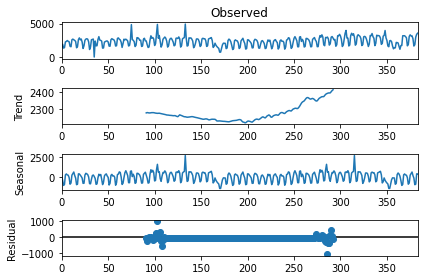

In [27]:
fig=a.plot()

In [28]:
def st_check(timeseries):
  dftest=adfuller(timeseries, autolag='AIC')
  dfoutput=pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of observations used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
  print(dfoutput) 

st_check(df.caunt)

Test Statistic                  -3.299737
p-value                          0.014890
#Lags Used                      15.000000
Number of observations used    368.000000
Critical Value (1%)             -3.448245
Critical Value (5%)             -2.869426
Critical Value (10%)            -2.570971
dtype: float64


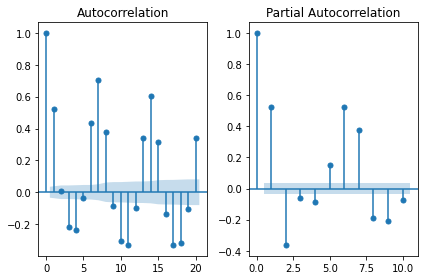

In [29]:
l=(1,2)
a=plt.subplot2grid(l,(0,0))
p=plt.subplot2grid(l,(0,1))
smt.graphics.plot_acf(df.caunt, lags=20, ax=a, alpha=0.5)
smt.graphics.plot_pacf(df.caunt, lags=10, ax=p, alpha=0.5)
plt.tight_layout()

In [30]:
model_df = df.loc[:, ['date', 'caunt']].rename(columns={"date":"ds", "caunt":"y"})
model_df.tail()

,ds,y
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389
372,2016-01-20,3559


In [31]:
model = Prophet(yearly_seasonality=True, interval_width=0.95)
model.fit(model_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
ft = model.make_future_dataframe(periods=30)
pred=model.predict(ft)
pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
409,2016-02-15,2855.268284,2230.863932,3465.942191
410,2016-02-16,3113.142163,2482.806355,3767.484082
411,2016-02-17,3028.627207,2376.555173,3625.819547
412,2016-02-18,2898.030959,2232.131258,3565.444991
413,2016-02-19,2648.639285,2020.178863,3310.304957


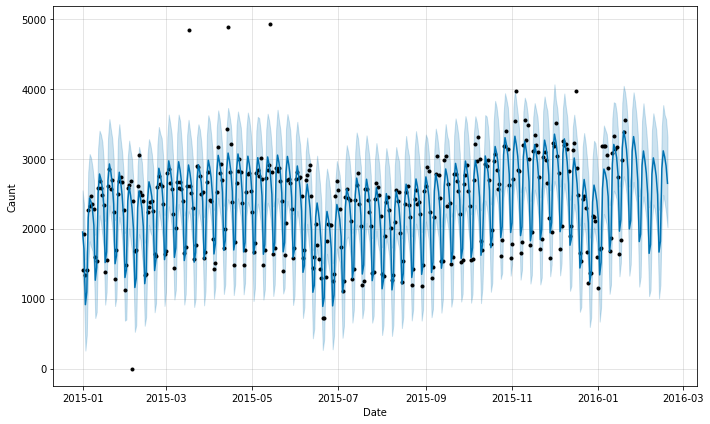

<Figure size 1152x576 with 0 Axes>

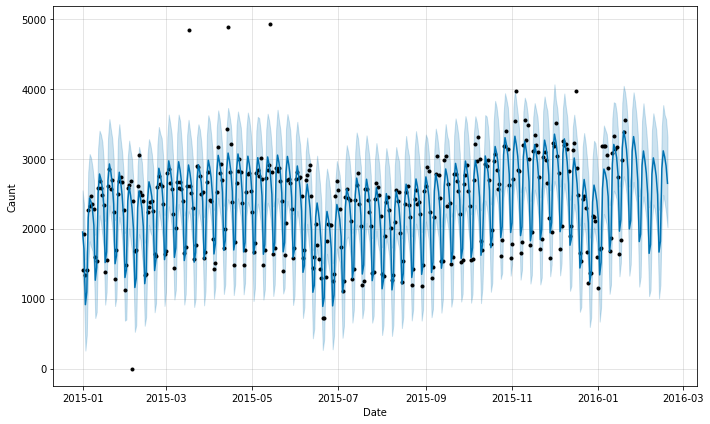

In [35]:
plt.figure(figsize=(16,8))
model.plot(pred,xlabel="Date", ylabel="Caunt")

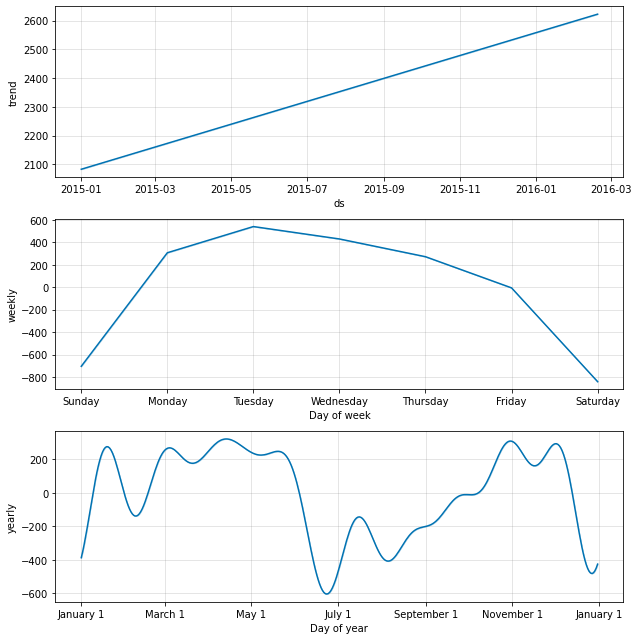

In [36]:
fig = model.plot_components(pred)

In [40]:
from neuralprophet import NeuralProphet

In [41]:
#!pip install NeuralProphet

In [42]:
df.head()

,date,caunt,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [59]:
y=model_df
y=y.reset_index()
y.drop('index', axis=1, inplace=True)
y.head()

,ds,y
0,2015-01-01,1414
1,2015-01-02,1920
2,2015-01-03,1338
3,2015-01-04,1404
4,2015-01-05,2264


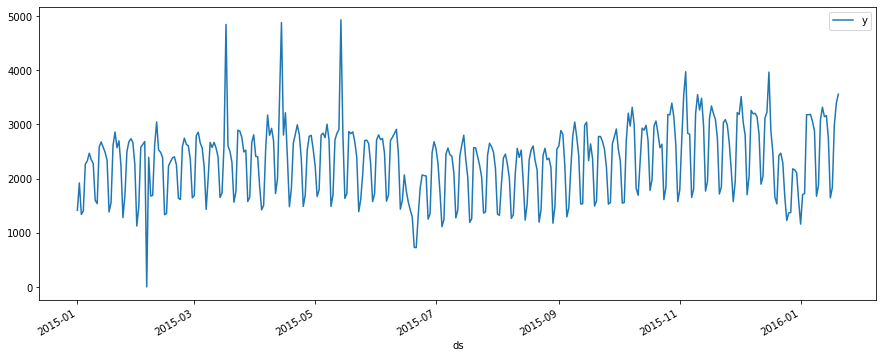

In [60]:
y.plot(x='ds',y='y',figsize=(15, 6))
plt.show()

In [70]:
# model = NeuralProphet() if you're using default variables below.
model = NeuralProphet(
    growth="linear",  # Determine trend types: 'linear', 'discontinuous', 'off'
    changepoints=None, # list of dates that may include change points (None -> automatic )
    n_changepoints=5,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="additive",
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    num_hidden_layers=0,
    d_hidden=None,     # Dimension of hidden layers of AR-Net
      # Sparcity in the AR coefficients #ar_sparsity=None,
    learning_rate=None,
    epochs=40,
    loss_func="Huber",
    normalize="auto",  # Type of normalization ('minmax', 'standardize', 'soft', 'off')
    impute_missing=True
)

In [71]:
metrics = model.fit(y,  freq="MS") 
future = model.make_future_dataframe(y, periods=10, n_historic_predictions=len(y)) 
forecast = model.predict(future)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.479% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency MS is different than major frequency D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:NP.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling

Finding best initial lr:   0%|          | 0/217 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.479% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.479% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency MS is different than major frequency D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.954% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.954% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency MS is different than major frequency D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.954% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.954% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency MS is different than major frequency D


Predicting: 24it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


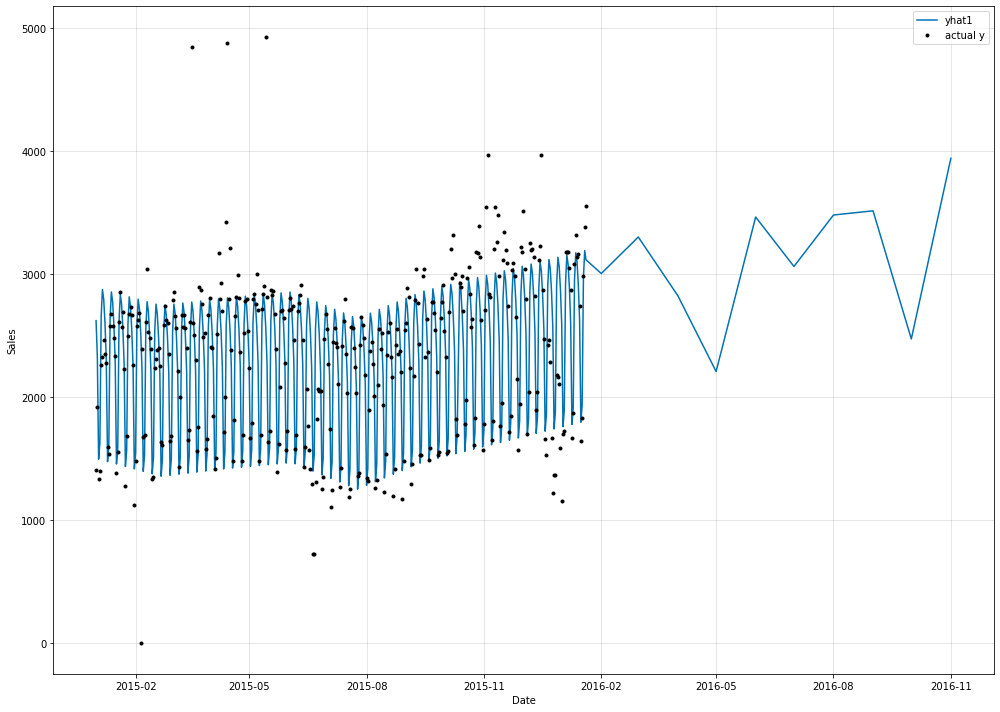

In [72]:
#plotting predictions
fig, ax = plt.subplots(figsize=(14, 10)) 
model.plot(forecast, xlabel="Date", ylabel="Sales", ax=ax);

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


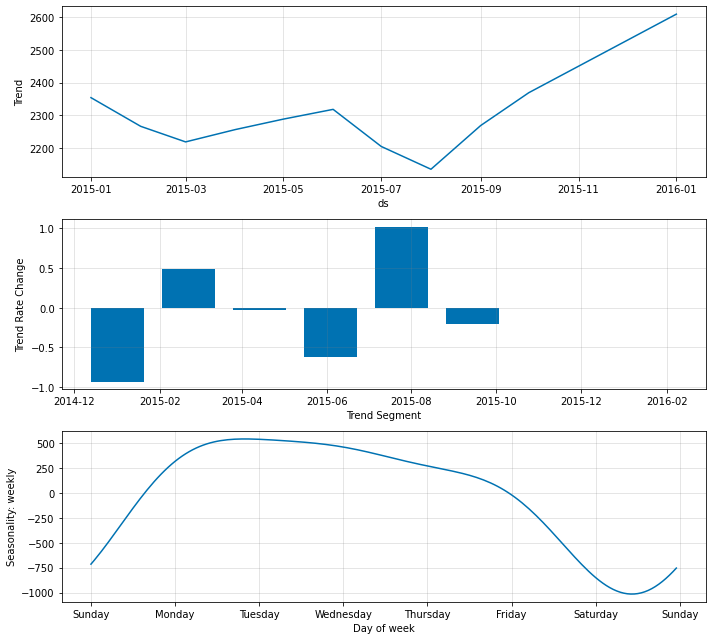

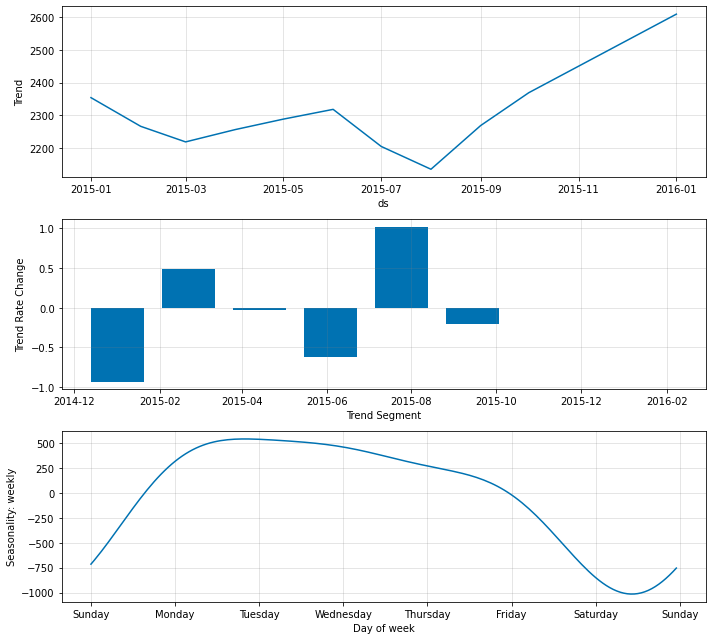

In [73]:
#plotting components of model
model.plot_parameters()